# Customer churn prediction project 

Customer churn is a significant challenge faced by many industries, which can lead to decreased revenue, reduced customer satisfaction, and a negative impact on brand image. The ability to predict which customers are at risk of churning can help companies take proactive measures to retain those customers. Machine learning can play a crucial role in predicting customer churn, as it can analyze large amounts of data and identify patterns that may not be apparent through traditional data analysis methods.In this study, After our literature survey we found that Feed-forward Neural Network  and Recurrent Neural Network (RNN) are two deep neural networks that have demonstrated their ability to identify various dynamic patterns in unstructured textual Customer lifetime value (CLV) data but suffer from few limitations, hence we introduced an RNN-based model for churn prediction, that not only surpasses existing constraints and excels in aspects such as prediction, precision, and recall. 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Data Description:

Customer churn is a significant challenge for the industries. Many industries focus on the churn rate of customers because customers retentions can save the company from downfall. Hence, the data is collected from different industries from Germany, Spain and France. There are 10,000 samples and 14 features. The attributes are explained below:

1. RowNumber: The column specifies the row number.

2. CustomerID: The customer identification number.

3. Surname: The last name of the customers. 

4. CreditScore: The credit score of the customers based on the customers credit reports.

5. Geography: The country where the customer resides. The information is populated from Spain, Germany and France.

6. Gender: The gender identity of the customer whether male or female.

7. Age: The age of the customer.

8. Tenure: The number of years the customer has been subscribing the company's product.

9. Balance: The account balance of the customer.

10. NumOfProducts: The number of products subscribed by the customer.

11. HasCrCard: Does the person has credit card or not. If the customer has credit card then the numberical value assigned is 1 and if he does not then the numerical value is 0.

12. IsActiveMember: Is the customer now active. If the customer is active then the value is 1 otherwise 0.

13. EstimatedSalary: The predicted salary of the customer.

14. Exited: The targed variable in the dataset. If the customer has churned then the value is 1 otherwise 0.

In [2]:
# Importing the dataset

data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Visualization and Analysis

<Axes: xlabel='CreditScore', ylabel='Balance'>

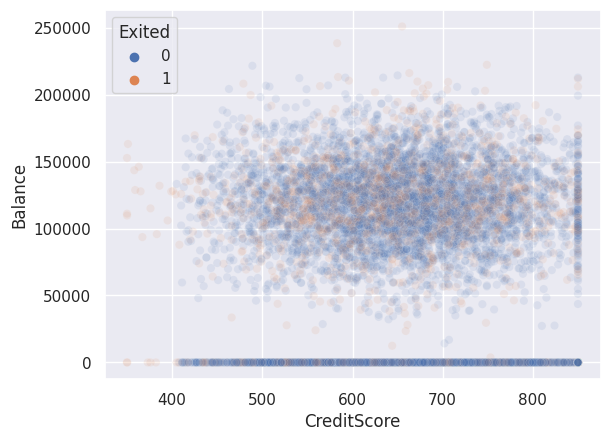

In [3]:
sns.scatterplot(x='CreditScore', y='Balance', data=data, alpha=0.1, hue='Exited')

<Axes: xlabel='Exited', ylabel='count'>

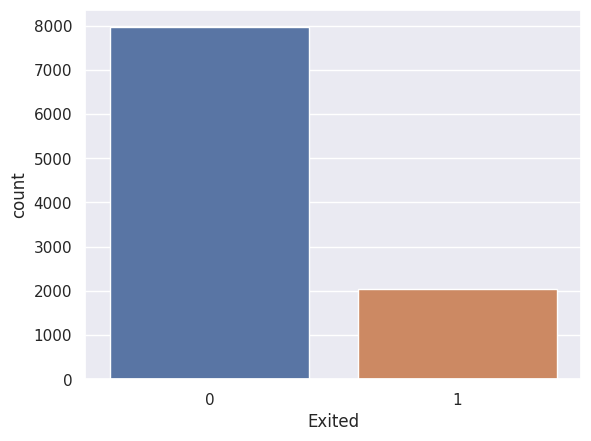

In [4]:
sns.countplot(data = data, x='Exited')

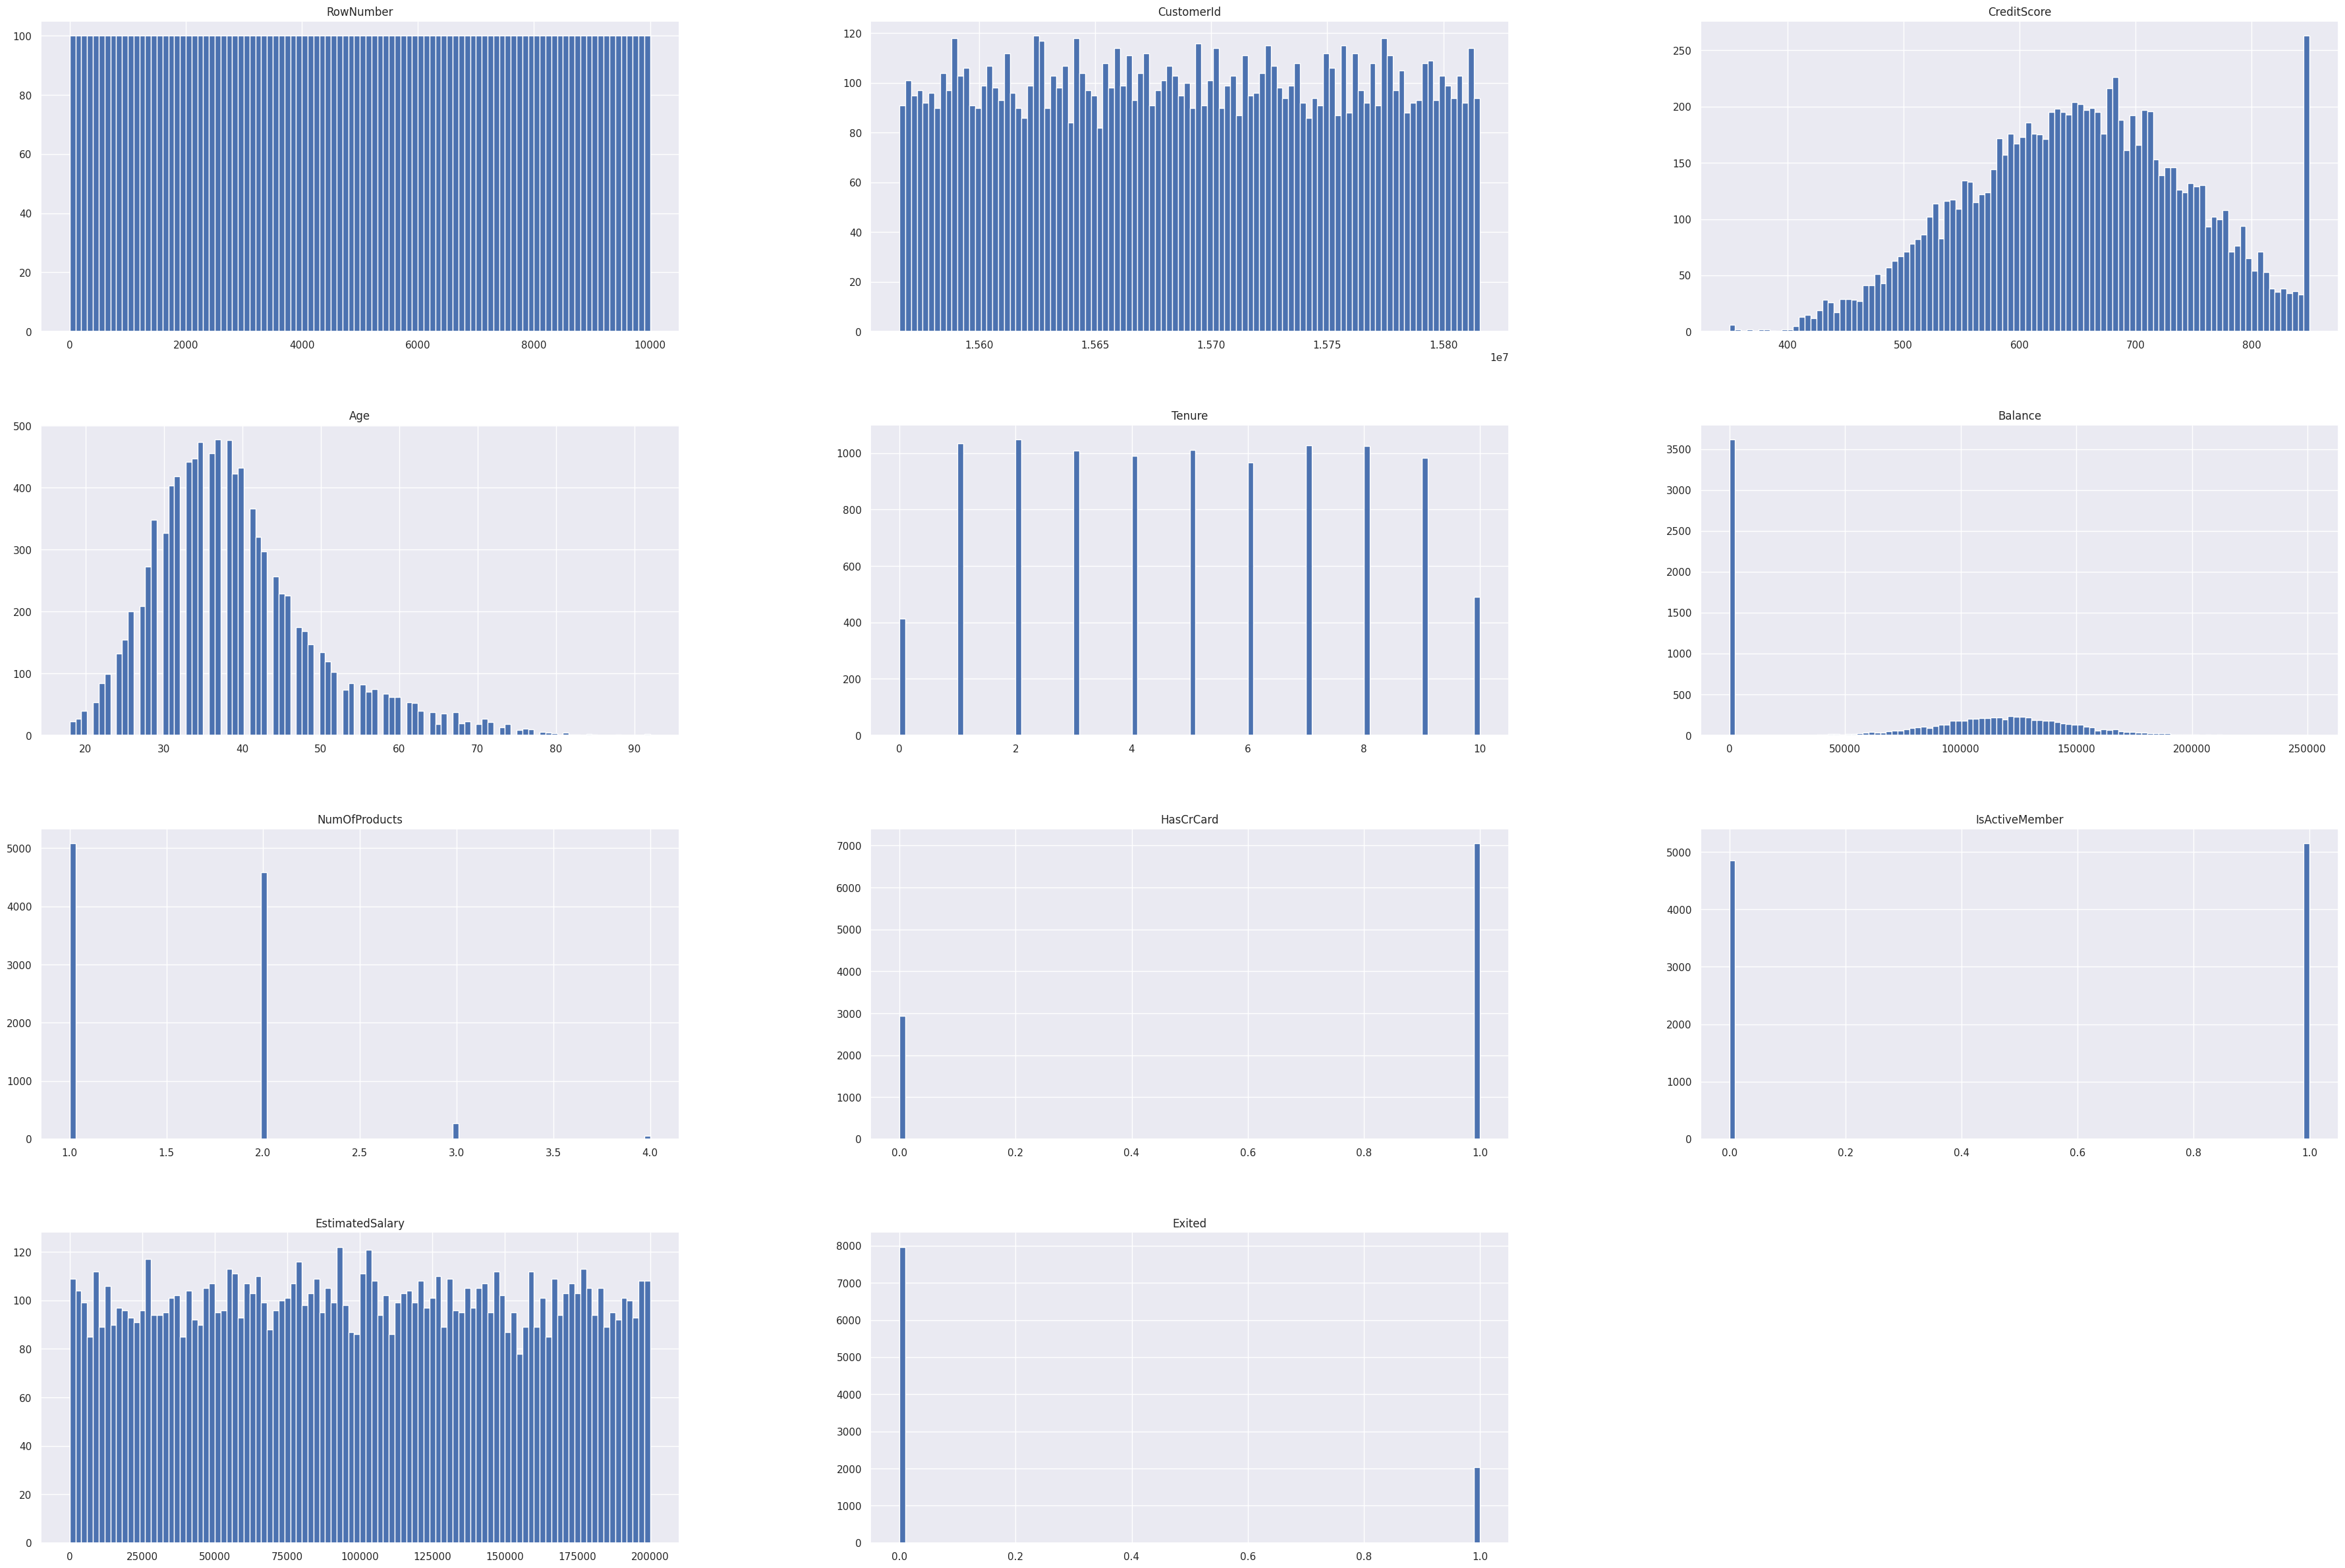

In [5]:
data.hist(bins=100, figsize=(45, 30))
plt.show()

<ipython-input-6-ad670bbbed45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

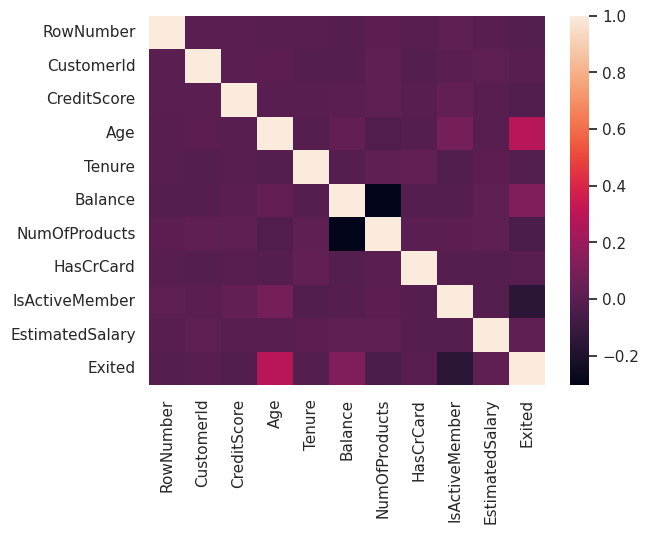

In [6]:
correlation = data.corr()
round(correlation, 2)
sns.heatmap(correlation)

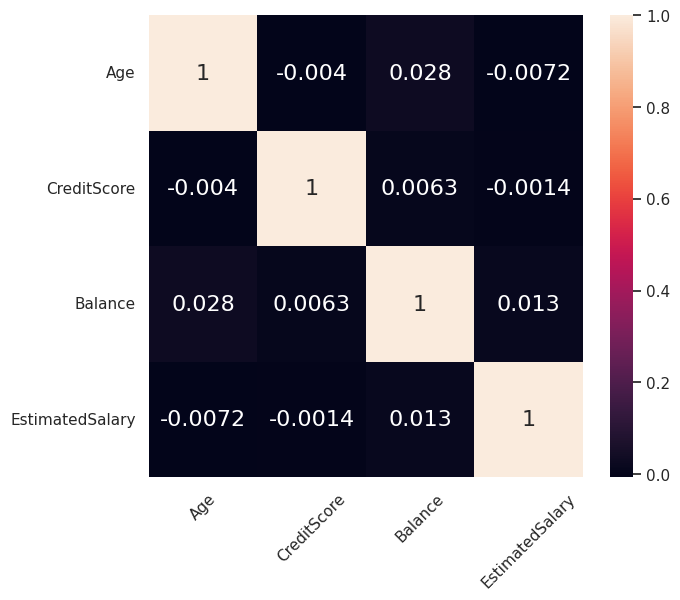

In [7]:
fig, ax = plt.subplots(figsize=(7, 6))

features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

sns.heatmap(data[features].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

## Analysis from data visualization:

From the data visualizations, the following conclusions can be drawn:

1) The data is imbalanced because we can see that the customers who churned are very much less when compared to the customers who did not churn.

2) The heatmap explains the correlations between features and we can identify that CustomerId, Surname, Age and Gender does not have any significance in the dataset.

3) 

## Data Preprocessing 

In [8]:
# The data needs to be preprocessed before training the module. Hence, check for the null values in the dataset.

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Dropping the irrevelant or insignificant features from the dataset

data.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
# The data consists of categorical variables. So, the categorical variables are converted to numberical variables using the label encoder.

from sklearn.preprocessing import LabelEncoder

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

data['Geography'] = data['Geography'].map({
    'Germany': 1,
    'Spain': 0,
    'France': 0
})

In [11]:
# Analyzing the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [12]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.250900,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.433553,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Methods : The proposed RNN model

In [13]:
# Loading the features and the target variable of the dataset in X and Y to split the data

X = data.drop(columns = ['Exited'])
T = data['Exited']

In [14]:
# Spliting the data using train-test-split
# The 80% of the dataset is used for training and the 20% of the dataset is used for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=42)

### Creating the proposed RNN model:

The model is constructed using Keras' sequential approach, incorporating an LSTM layer, followed by a GRU layer, and three dense layers. The initial LSTM layer generates sequences equal in length to the input data, utilizing the Glorot uniform initializer for weight initialization. Subsequently, a GRU layer is added, which also returns sequences with the same length as the input. Both LSTM and GRU layers are types of recurrent neural networks (RNNs) designed to manage sequential data by maintaining and updating a hidden state over time. Two dense layers consisting of 32 and 10 units each are introduced after the GRU layer. These layers execute linear transformations on the input data and apply a non-linear ReLU activation function to generate the output. The final dense layer, with a single unit, is not considered a hidden layer since it directly yields the model's output.

In [15]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[10,1], kernel_initializer='glorot_uniform'),
    tf.keras.layers.GRU(48, activation='relu', return_sequences=True, kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer='glorot_uniform')
])

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 gru (GRU)                   (None, 10, 48)            16416     
                                                                 
 dense (Dense)               (None, 10, 32)            1568      
                                                                 
 dense_1 (Dense)             (None, 10, 10)            330       
                                                                 
 dense_2 (Dense)             (None, 10, 1)             11        
                                                                 
Total params: 35,221
Trainable params: 35,221
Non-trainable params: 0
_________________________________________________________________


### Explanation of the code for creating the model:

This is a model architecture consisting of two recurrent layers (LSTM and GRU) followed by three dense layers.

The first layer is an LSTM layer with 64 units, which takes input sequences of length 10 with one feature per time step. The return_sequences=True argument specifies that the layer should return output for each time step in the input sequence, rather than just the final output.

The second layer is a GRU layer with 48 units and ReLU activation function, which also returns sequences for each input time step.

The next three layers are dense layers with 32, 10, and 1 units, respectively, each with ReLU activation function. The final layer has a single output unit with a ReLU activation function, which makes it suitable for regression tasks where the output is non-negative.

The kernel_initializer='glorot_uniform' argument specifies that the initial weights of each layer should be initialized using the Glorot uniform initialization method, which is a popular method for initializing weights in deep learning models.

The model.summary() function is used to print a summary of the model architecture, including the shape of the output from each layer, the number of parameters in the model, and the total number of trainable parameters.

In [16]:
# The  proposed RNN model is configured for training using the optimizer, loss functions and the accuracy metrics. 
# The binary_crossentropy is a commonly used loss function for binary classification problems. 
# This loss function is designed to measure the difference between predicted probabilities of the model and the true binary labels.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [17]:
# Train the model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 13s 18ms/step - loss: 0.4954 - accuracy: 0.7942 - val_loss: 0.4654 - val_accuracy: 0.8035
Epoch 2/20
250/250 [==============================] - 3s 14ms/step - loss: 0.4757 - accuracy: 0.7937 - val_loss: 0.4467 - val_accuracy: 0.8024
Epoch 3/20
250/250 [==============================] - 4s 15ms/step - loss: 0.4650 - accuracy: 0.7943 - val_loss: 0.4443 - val_accuracy: 0.8049
Epoch 4/20
250/250 [==============================] - 3s 13ms/step - loss: 0.4593 - accuracy: 0.7987 - val_loss: 0.4404 - val_accuracy: 0.8093
Epoch 5/20
250/250 [==============================] - 3s 13ms/step - loss: 0.4554 - accuracy: 0.8007 - val_loss: 0.4400 - val_accuracy: 0.8140
Epoch 6/20
250/250 [==============================] - 4s 15ms/step - loss: 0.4536 - accuracy: 0.8039 - val_loss: 0.4375 - val_accuracy: 0.8138
Epoch 7/20
250/250 [==============================] - 3s 13ms/step - loss: 0.4498 - accuracy: 0.8090 - val_loss: 0.4279 - val_accuracy: 0.822

### Explanation of code:

This model.fit method train the model with the specified training data, hyperparameters, and validation data.

The X_train and y_train arguments are the input features and target labels for the training data, respectively.

The epochs argument specifies the number of times the model will be trained on the entire training dataset. In this case, the model will be trained for 20 epochs.

The batch_size argument specifies the number of samples per batch of data that the model will use during training. In this case, the model will use batches of 32 samples during training.

The validation_data argument specifies the input features and target labels for the validation dataset. The model will evaluate its performance on this dataset at the end of each epoch to monitor its progress during training.

After training is complete, the fit() method returns a history object that contains information about the training and validation loss and accuracy at each epoch. This information can be used to visualize the training progress and to fine-tune the model hyperparameters.

## Comparing the proposed models with the pre existing models:

To compare the proposed models with the pre-existing models. The existing models are imported needs to be compared:

1) KNeighbours Classifier

2) Support vector machines

3) Decision Tree Classifier

4) Random Forest Classifier



### KNeighbours classifer:



K-Nearest Neighbors (k-NN) is a type of supervised learning algorithm that can be used for both classification and regression tasks. It is a non-parametric algorithm, which means it does not make any assumptions about the underlying distribution of the data.

To make a prediction for a new data point, the k-NN algorithm calculates the distances between the new data point and all the training data points, and selects the k training data points with the shortest distances. These k nearest neighbors then "vote" on the class label of the new data point, and the majority class label is assigned to the new data point.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors = 5) 
model1.fit(X_train,y_train)
model1_pred = model1.predict(X_test)
model1_acc = model1.score(X_test,y_test)
print("KNN accuracy:",model1_acc)

KNN accuracy: 0.764


#### Explanation of code:

The KNeighborsClassifier function from the sklearn.neighbors module is used to create the k-NN model. Here, n_neighbors = 5 means that the model will consider the 5 nearest neighbors to make a classification decision.

Then the fit() method is called on the model object model1 to train the model on the training data X_train and y_train. After the model is trained, it can be used to make predictions on new, unseen data.

###Support Vector Machines

classification and regression analysis. It is a binary classifier that finds a decision boundary to separate data points into different classes. SVM is based on the idea of finding the best possible decision boundary that can separate the data points in a high-dimensional space.

In the case of binary classification, SVM tries to find a hyperplane that separates the data points into two classes. The hyperplane is chosen in such a way that it maximizes the margin between the two classes. Margin is the distance between the hyperplane and the closest data points from each class. This is called a maximum margin hyperplane. The intuition behind this is that the larger the margin, the more robust the classifier is to new data.



In [19]:
from sklearn.svm import SVC

model2 = SVC(random_state = 1)
model2.fit(X_train,y_train)
model2_pred = model2.predict(X_test)
model2_acc = model2.score(X_test,y_test)
print("SVM accuracy is :",model2_acc)

SVM accuracy is : 0.8035


#### Explanation of code:

The Support Vector Machine (SVM) model is created using the SVC class from scikit-learn. The SVC class is a popular implementation of SVM for classification problems.

The random_state parameter sets the seed for the random number generator used in the SVM algorithm, which is used to initialize the model's internal random number generator. Setting the random_state parameter to a fixed value ensures that the SVM algorithm produces consistent results for the same input data and parameters, which is useful for reproducibility.

After creating the SVC object, the fit method is called to train the SVM model on the training data. During training, the SVM algorithm tries to find the hyperplane that separates the data points into different classes with the maximum margin, while also minimizing the classification error.

### Decision Tree Classifier


Decision tree classifier is a machine learning algorithm used for classification and regression analysis. It works by partitioning the data into smaller sub-groups by recursively selecting the most important feature to make the next decision.

The idea behind decision tree classification is to create a tree-like model of decisions and their possible consequences. Each internal node of the tree represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label. The tree is constructed in a way that each decision is made to maximize the information gain of the model.

To classify a new instance, the model traverses the decision tree from the root node to a leaf node based on the values of the features of the instance. The class label associated with the leaf node reached by the instance is then assigned to the instance.

In [20]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
model3_pred = model3.predict(X_test)
model3_acc = model3.score(X_test,y_test)
print("Decision Tree accuracy is :",model3_acc)

Decision Tree accuracy is : 0.7765


#### Explanation of code:

The DecisionTreeClassifier class imported from the scikit-learn library and creates an instance of this class named model3.

After creating the Decision Tree Classifer object, the fit method is called to train the model on the training data. During training, the algorithm tries to find the hyperplane that separates the data points into different classes with the maximum margin, while also minimizing the classification error.

### Random Forest Classifier


Random Forest Classifier is an ensemble learning algorithm that constructs multiple decision trees during training and outputs the class that is the mode of the classes output by individual trees. The algorithm randomly selects a subset of features and data samples to train each decision tree, which helps to reduce overfitting.

In scikit-learn, we can use the RandomForestClassifier class to implement the Random Forest algorithm. This class takes several parameters, such as the number of trees to be constructed, the maximum depth of each tree, and the number of features to be considered for splitting at each node. Once the model is trained, we can use the predict method to predict the class labels for new data.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model4 = RandomForestClassifier(n_estimators=1)
model4.fit(X_train, y_train)

model4_pred = model4.predict(X_test)
model4_acc = metrics.accuracy_score(y_test, model4_pred)
print (model4_acc)

0.796


#### Explanation of code:

The Random Forest Classifier using the RandomForestClassifier class from the sklearn.ensemble module, with n_estimators=1 is implemented to create the model.

n_estimators is a hyperparameter that determines the number of decision trees that will be used in the random forest. In this case, only a single decision tree will be used.

The fit() method is then called on the model object, which takes the training data X_train and the corresponding labels y_train as input, and fits the model to the training data by building the decision tree(s).



## Results

### Results of proposed model:

Accuracy of proposed model: 81.59875869750977


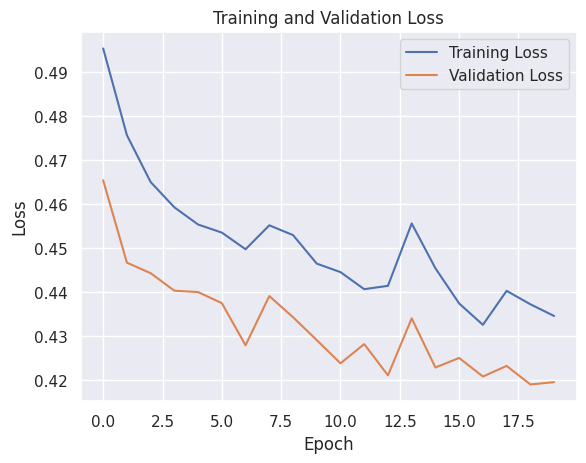

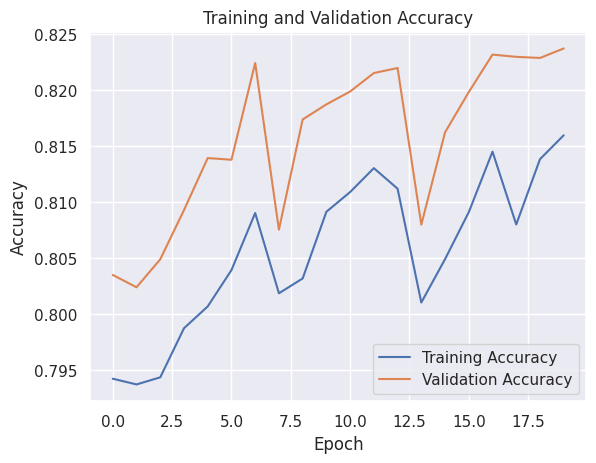

In [28]:
print("Accuracy of proposed model:", history.history['accuracy'][-1] * 100)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results of pre-existing models

#### Results of KNeighbours Classifier model

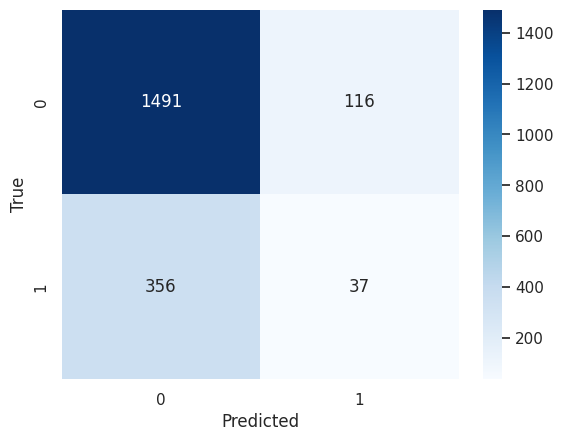

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



In [29]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, model1_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, model1_pred))

#### Results of Support Vector Machines model

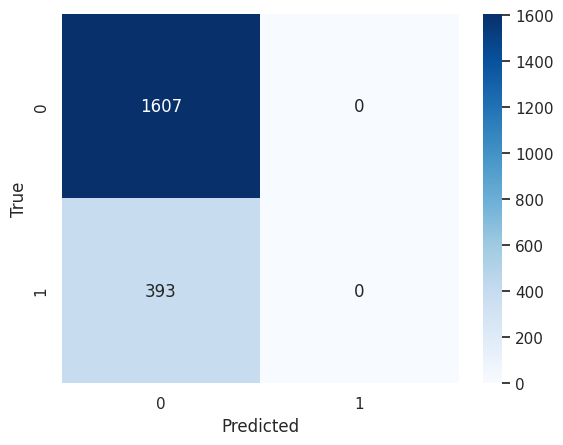

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
cm = confusion_matrix(y_test, model2_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, model2_pred))

#### Results of Decision Tree Classifier

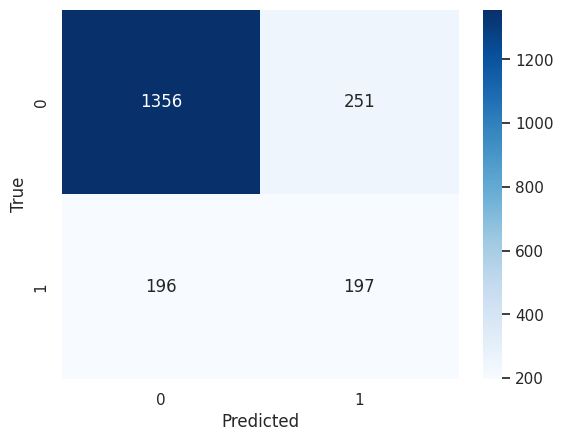

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



In [31]:
cm = confusion_matrix(y_test, model3_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, model3_pred))

#### Results of Random forest classifier

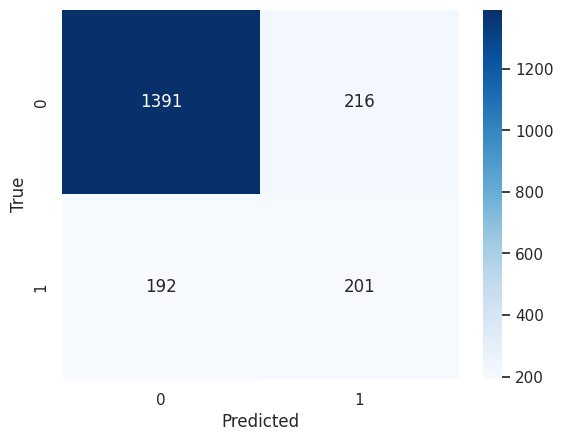

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.48      0.51      0.50       393

    accuracy                           0.80      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [32]:
cm = confusion_matrix(y_test, model4_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, model4_pred))